In [ ]:
import warnings

# Coisa do Windows

# Ignorar o warning específico do KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
# Voltar ao normal
# warnings.filterwarnings("default")

# Trabalho Prático 1 de Ciência de Dados

## Download e leitura

#### Download dos dados

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'id' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


#### Leitura dos dados

In [3]:
import pandas as pd

filmes_df = pd.read_csv("filmes.csv")
# filmes_df = filmes_df.sample(n=1000)
filmes_df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston']
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch']
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker']
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer']
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann']


## Pré-processamento dos dados

In [4]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
from nltk import sent_tokenize, word_tokenize

#### Extrair sinopse do dataframe

In [6]:
sinopses = filmes_df.sinopse
sinopses.head()

0    When two kids find and play a magical board ga...
1    John and Max resolve to save their beloved bai...
2    Based on Terry McMillan's novel, this film fol...
3    George Banks must deal not only with his daugh...
4    A group of high-end professional thieves start...
Name: sinopse, dtype: object

In [7]:
sinopses.shape

(30358,)

#### Convertendo os tokens

In [8]:
!pip install unidecode

In [9]:
import string
import unidecode

Convertendo todos os tokens para letras minúsculas

In [10]:
def tokens_low(tokens):
  return [w.lower() for w in tokens]

Removendo os símbolos de pontuação

In [11]:
table = str.maketrans('', '', string.punctuation)

In [12]:
def tokens_pontuacao(tokens):
  return [w.translate(table) for w in tokens]

Convertendo carcteres especiais

In [13]:
def tokens_char_especical(tokens):
  return [unidecode.unidecode(w).lower() for w in tokens]

#### Filtrando apenas palavras

Extraindo apenas as palavras da lista de tokens

In [14]:
def tokens_apenas_words(tokens):
  return [word for word in tokens if word.isalpha()]

Removendo stop words

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def tokens_stop_words(tokens):
  return [word for word in tokens if not word in stop_words]

#### Stemming

In [18]:
from nltk.stem.porter import PorterStemmer

In [19]:
porter = PorterStemmer()

In [20]:
def tokens_stemming(tokens):
  return [porter.stem(word) for word in tokens]

#### Tokenizer Personalizado

In [21]:
def tokenizer_personalizado(texto):
  tokens = word_tokenize(texto)

  tokens = tokens_low(tokens)
  tokens = tokens_pontuacao(tokens)
  tokens = tokens_char_especical(tokens)
  tokens = tokens_apenas_words(tokens)
  tokens = tokens_stop_words(tokens)
  tokens = tokens_stemming(tokens)

  return tokens

## Construção da matriz de TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Cada linha do array é uma sinopse
D = [sin for sin in filmes_df.sinopse]

### Usando Tokenizer Personalizado

In [24]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer_personalizado)
X = vectorizer.fit_transform(D)

c:\Users\alanz\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
vectorizer.get_feature_names_out()

array(['aa', 'aadhavan', 'aadhi', ..., 'zylberberg', 'zylberstein',
       'zyto'], dtype=object)

In [27]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,aa,aadhavan,aadhi,aakansha,aakash,aaliya,aalst,aaltonen,aamir,aang,...,zuzu,zvezda,zweig,zydruna,zyga,zygon,zyl,zylberberg,zylberstein,zyto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Redução de dimensionalidade

In [28]:
import matplotlib.pyplot as plt
import numpy as np

### Usando PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
# pca = PCA(n_components=3500)

In [31]:
# pca.fit(X)

In [32]:
# fig = plt.figure(figsize=(7, 5))
# plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel(r'$k$ - Número de componentes principais')
# plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [33]:
# X_REDUCED = pca.transform(X)

In [34]:
# X_REDUCED

### Usando SVD

In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [36]:
svd = make_pipeline(TruncatedSVD(n_components=3500), Normalizer(copy=False))

In [37]:
svd.fit(X)

Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=3500)),
                ('normalizer', Normalizer(copy=False))])

Text(0, 0.5, '$f(k)$ - Fração cumulativa da variância explicada')

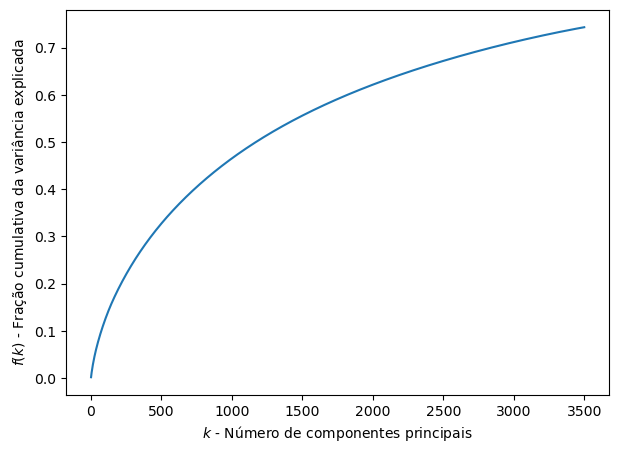

In [38]:
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, svd[0].n_components + 1)], np.cumsum(svd[0].explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [39]:
X_REDUCED = svd.transform(X)

In [40]:
X_REDUCED

array([[ 0.13861158, -0.02553638,  0.0093073 , ..., -0.00463873,
        -0.00090798,  0.00344592],
       [ 0.06934703, -0.02860012, -0.02031758, ...,  0.00062743,
        -0.00080861,  0.0061302 ],
       [ 0.08749382,  0.007549  , -0.06161968, ...,  0.00103815,
        -0.00442023, -0.00585562],
       ...,
       [ 0.03878593, -0.03213765,  0.00400068, ..., -0.00097894,
        -0.00446412, -0.00543452],
       [ 0.16620147,  0.07512529,  0.11545595, ...,  0.00795573,
         0.00423607,  0.01502825],
       [ 0.09908274, -0.04554778, -0.01878054, ..., -0.0028497 ,
         0.00421837, -0.00357954]])

## Verificando os Generos

In [41]:
generos_dos_filmes = filmes_df.genres
generos_dos_filmes

0                Family
1               Romance
2               Romance
3        Romance,Family
4          Crime,Action
              ...      
30353         Biography
30354         Biography
30355      Crime,Horror
30356           Romance
30357            Action
Name: genres, Length: 30358, dtype: object

In [42]:
s_generos_compostos = set()

for genero in generos_dos_filmes:
    if genero not in s_generos_compostos:
        s_generos_compostos.add(genero)

print(len(s_generos_compostos))
s_generos_compostos

73


{'Action',
 'Action,Family',
 'Biography',
 'Biography,Action',
 'Biography,Family',
 'Crime',
 'Crime,Action',
 'Crime,Action,Family',
 'Crime,Biography',
 'Crime,Biography,Action',
 'Crime,Family',
 'Crime,Horror',
 'Crime,Horror,Action',
 'Crime,Musical,Horror',
 'Crime,Romance,Horror',
 'Crime,Sci-Fi,Horror',
 'Family',
 'Horror',
 'Horror,Action',
 'Horror,Action,Family',
 'Horror,Biography',
 'Horror,Crime',
 'Horror,Family',
 'Musical',
 'Musical,Action',
 'Musical,Biography',
 'Musical,Biography,Family',
 'Musical,Crime',
 'Musical,Crime,Action',
 'Musical,Family',
 'Musical,Horror',
 'Musical,Romance',
 'Musical,Romance,Action',
 'Musical,Romance,Crime',
 'Musical,Romance,Family',
 'Musical,Sci-Fi',
 'Musical,Sci-Fi,Horror',
 'Romance',
 'Romance,Action',
 'Romance,Biography',
 'Romance,Crime',
 'Romance,Crime,Action',
 'Romance,Crime,Family',
 'Romance,Family',
 'Romance,Horror',
 'Romance,Horror,Action',
 'Romance,Horror,Sci-Fi',
 'Romance,Sci-Fi',
 'Romance,Sci-Fi,Action',


In [43]:
s_generos_simples = set()
for filme_g in generos_dos_filmes:
    gs = filme_g.split(sep=',')
    for g in gs:
        if g not in s_generos_simples:
            s_generos_simples.add(g)

print(len(s_generos_simples))
s_generos_simples

9


{'Action',
 'Biography',
 'Crime',
 'Family',
 'Horror',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport'}

## K-means

In [44]:
from sklearn.cluster import KMeans

### Verificando o K-means - Escolha do K

In [45]:
import sklearn.metrics as metrics
import seaborn as sns

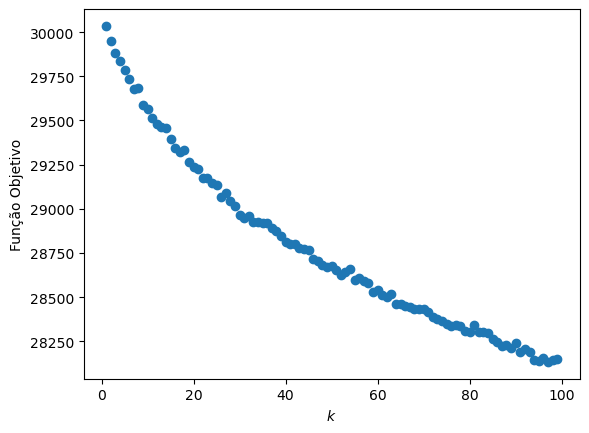

In [46]:
inertia = []
max_groups = 100
for i in range(1, max_groups):
  km = KMeans(n_clusters = i)
  km.fit(X_REDUCED)
  inertia.append(km.inertia_)

plt.scatter(range(1, max_groups), inertia)
_ = plt.ylabel("Função Objetivo")
_ = plt.xlabel(r"$k$")

For n_clusters = 5 The average silhouette_score is : 0.0030722754874090365
For n_clusters = 6 The average silhouette_score is : 0.0031639056255427815
For n_clusters = 9 The average silhouette_score is : 0.004363383366629934
For n_clusters = 10 The average silhouette_score is : 0.004621594080568317
For n_clusters = 12 The average silhouette_score is : 0.00528512682660856
For n_clusters = 40 The average silhouette_score is : 0.009156394518224698


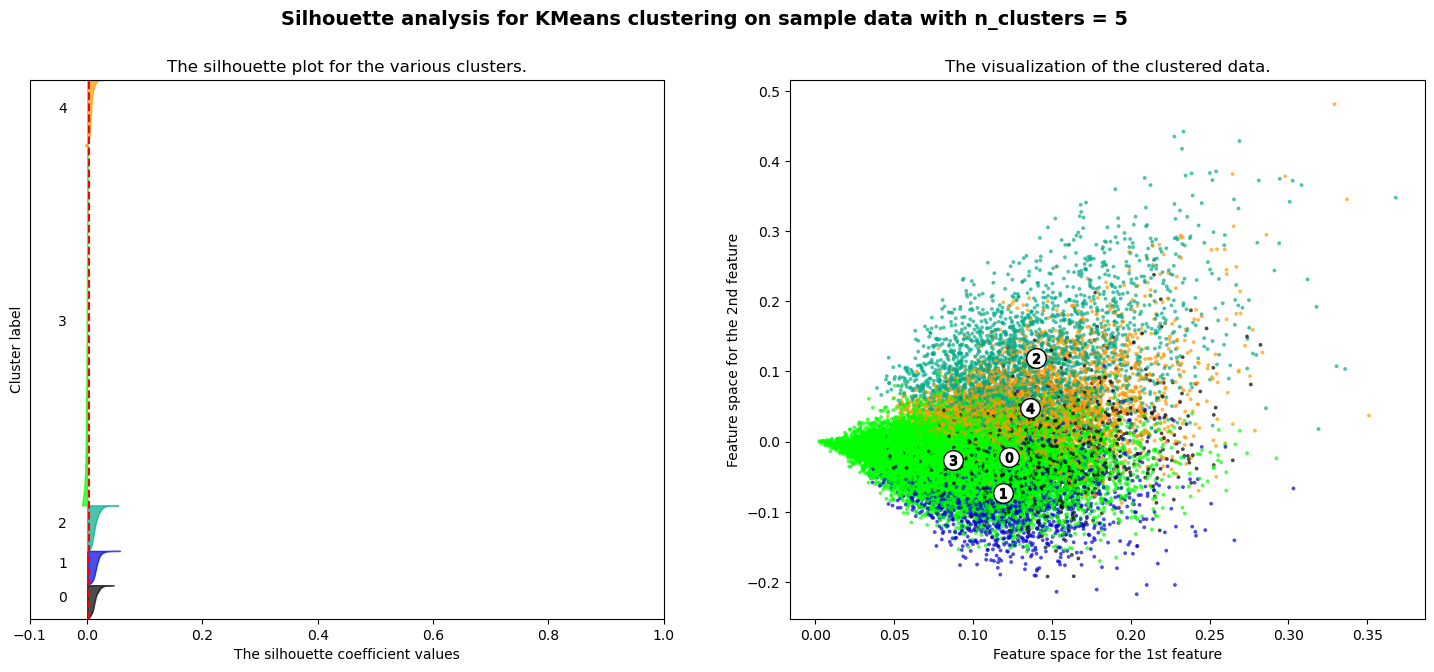

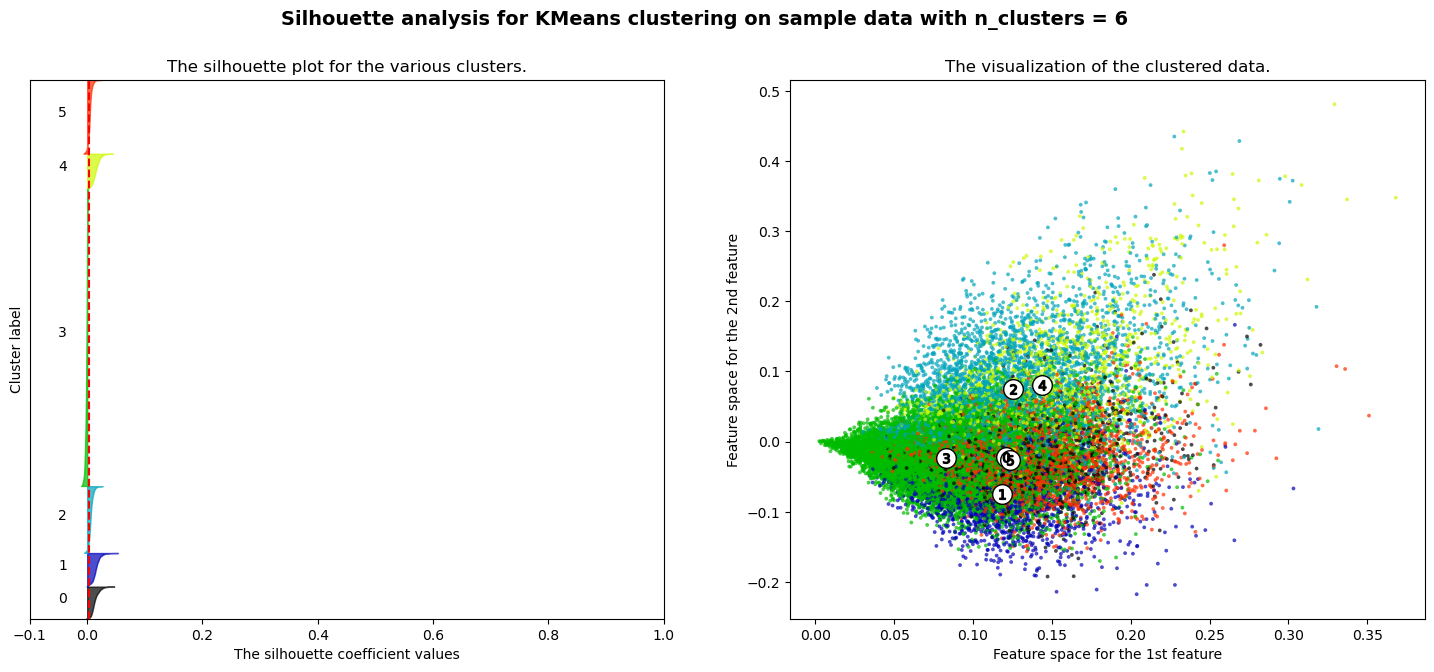

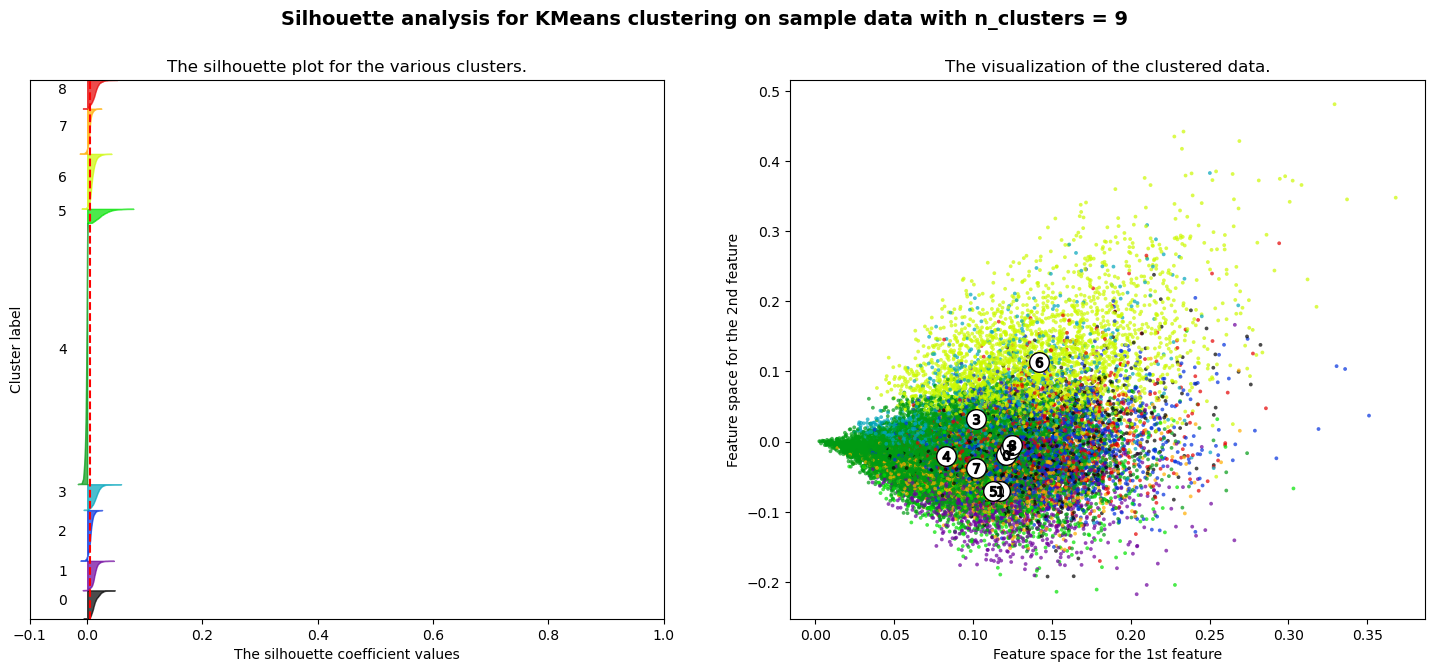

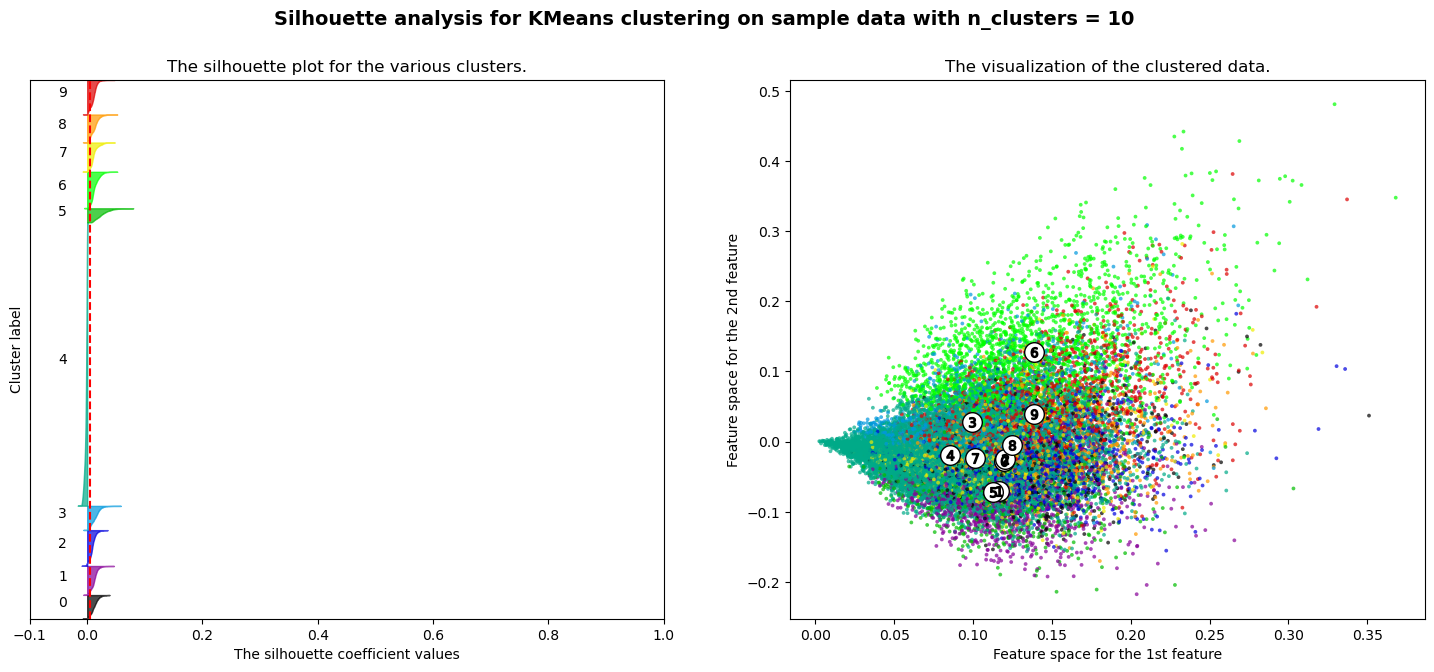

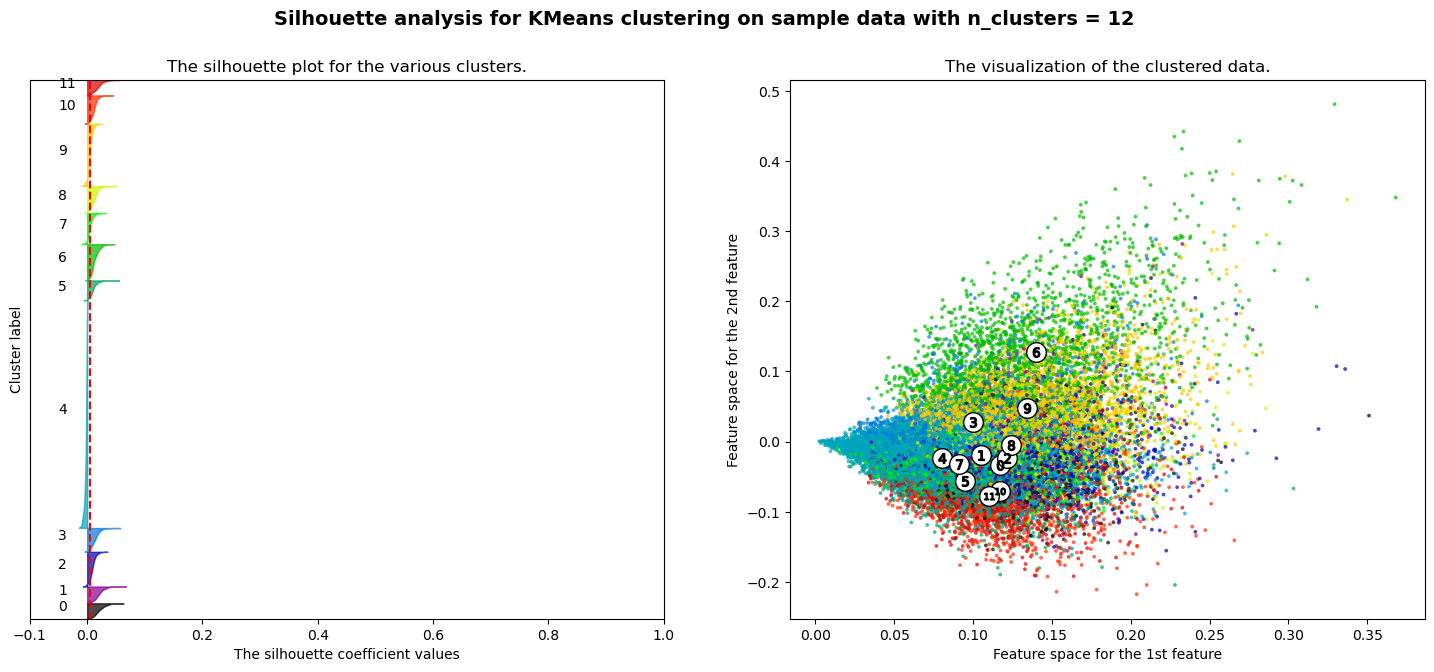

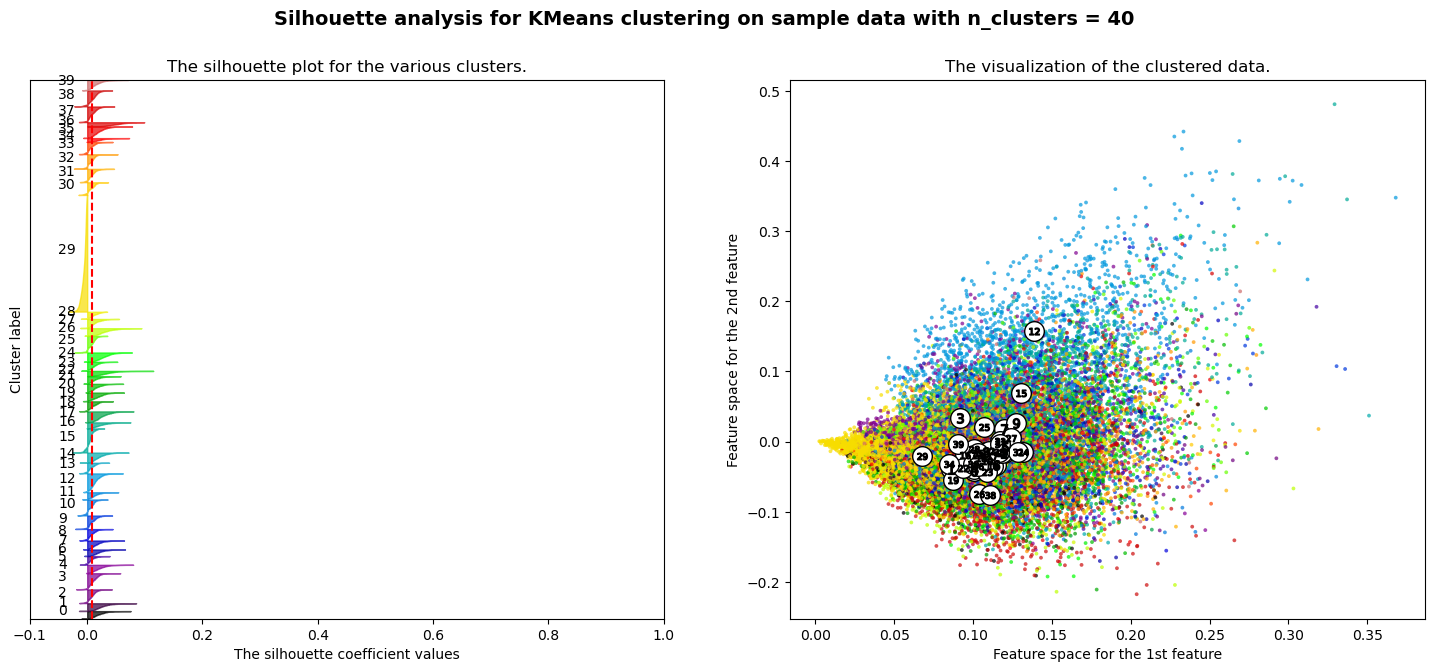

In [47]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = X_REDUCED

range_n_clusters = [5, 6, 9, 10, 12, 40]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

### Analisando os Grupos

In [48]:
k_groups = 40
kmeans = KMeans(n_clusters = k_groups)
kmeans.fit(X_REDUCED)
y_kmeans = kmeans.predict(X_REDUCED)

In [49]:
the_groups_genres = [[] for _ in range(k_groups)]

for filme_idx in range(len(y_kmeans)):
    grupo_idx = y_kmeans[filme_idx]
    the_groups_genres[grupo_idx].append(generos_dos_filmes[filme_idx])

the_groups_genres

[['Romance,Action',
  'Action',
  'Action',
  'Family',
  'Action',
  'Action',
  'Sport,Family',
  'Sport,Family',
  'Crime,Action',
  'Sport',
  'Family',
  'Crime,Action',
  'Action',
  'Family',
  'Crime',
  'Crime',
  'Crime',
  'Crime,Action',
  'Sci-Fi,Action',
  'Sci-Fi,Action',
  'Family',
  'Sport',
  'Crime,Action',
  'Sport',
  'Crime,Action',
  'Romance',
  'Family',
  'Family',
  'Sport',
  'Family',
  'Horror,Action',
  'Sport',
  'Crime,Biography',
  'Crime',
  'Romance',
  'Crime,Action',
  'Horror',
  'Crime',
  'Action',
  'Sport',
  'Romance',
  'Biography',
  'Romance',
  'Sport',
  'Sport',
  'Sci-Fi,Horror,Action',
  'Sci-Fi,Horror,Action',
  'Action',
  'Musical,Romance',
  'Horror',
  'Sport,Romance',
  'Action',
  'Sci-Fi,Horror,Action',
  'Crime',
  'Sport',
  'Romance,Crime',
  'Crime',
  'Crime,Action',
  'Crime',
  'Sport,Action',
  'Horror',
  'Sport',
  'Sport',
  'Sport',
  'Crime,Action',
  'Family',
  'Crime,Action',
  'Family',
  'Family',
  'Sport,F

### Desconsiderando Gêneros Compostos

In [50]:
df_generos_padrao = pd.DataFrame(data=[[0, 0.0] for _ in range(len(s_generos_simples))], columns=['Quantidade', '%'], index=list(s_generos_simples))
df_generos_padrao

,Quantidade,%
Romance,0,0.0
Action,0,0.0
Sport,0,0.0
Horror,0,0.0
Crime,0,0.0
Family,0,0.0
Sci-Fi,0,0.0
Musical,0,0.0
Biography,0,0.0


In [51]:
from IPython.display import display

for i, grupo in enumerate(the_groups_genres):
    qtd_filmes = len(grupo)
    print("Grupo:", i, "| Quantidade de Filmes:", qtd_filmes)
    grupo_df = df_generos_padrao.copy(deep=True)

    g_composto_counter = {x:0 for x in s_generos_compostos if len(x.split(sep=',')) > 1}

    for filme in grupo:
        generos = filme.split(sep=',')
        
        if filme in g_composto_counter:
            g_composto_counter[filme] += 1
    
        for genero in generos:
            grupo_df.loc[genero, 'Quantidade'] += 1
    
    grupo_df['%'] = grupo_df['Quantidade'] * 100 / qtd_filmes

    display(grupo_df.T)
    count_df = pd.DataFrame(data=[g_composto_counter]).T
    count_df.columns = ['Quantidade']
    print('Top 5 Gêneros Compostos:')
    display(count_df.sort_values(by='Quantidade', ascending=False)[:5].T);print('-'*107)


Grupo: 0 | Quantidade de Filmes: 496


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,47.000000,198.000000,125.000000,65.000000,88.000000,42.000000,51.000000,16.000000,25.000000
%,9.475806,39.919355,25.201613,13.104839,17.741935,8.467742,10.282258,3.225806,5.040323


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Sport,Family","Sci-Fi,Horror","Horror,Action"
Quantidade,45,21,14,14,14


-----------------------------------------------------------------------------------------------------------
Grupo: 1 | Quantidade de Filmes: 516


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,261.000000,29.000000,1.000000,96.000000,133.000000,19.000000,11.000000,18.000000,20.000000
%,50.581395,5.620155,0.193798,18.604651,25.775194,3.682171,2.131783,3.488372,3.875969


Top 5 Gêneros Compostos:


,"Romance,Crime","Crime,Horror","Musical,Romance","Crime,Action","Sci-Fi,Horror"
Quantidade,16,12,9,8,5


-----------------------------------------------------------------------------------------------------------
Grupo: 2 | Quantidade de Filmes: 992


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,296.00000,214.000000,19.000000,183.000000,297.000000,44.000000,92.000000,32.000000,41.000000
%,29.83871,21.572581,1.915323,18.447581,29.939516,4.435484,9.274194,3.225806,4.133065


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Crime,Horror","Musical,Romance","Sci-Fi,Action"
Quantidade,61,34,18,18,15


-----------------------------------------------------------------------------------------------------------
Grupo: 3 | Quantidade de Filmes: 257


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,18.000000,126.000000,2.00000,93.00000,64.000000,10.000000,22.000000,3.000000,5.000000
%,7.003891,49.027237,0.77821,36.18677,24.902724,3.891051,8.560311,1.167315,1.945525


Top 5 Gêneros Compostos:


,"Crime,Action","Horror,Action","Sci-Fi,Action","Sci-Fi,Horror","Crime,Horror"
Quantidade,26,18,8,7,5


-----------------------------------------------------------------------------------------------------------
Grupo: 4 | Quantidade de Filmes: 835


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,291.000000,148.000000,19.000000,158.000000,169.000000,97.000000,26.000000,28.000000,21.00000
%,34.850299,17.724551,2.275449,18.922156,20.239521,11.616766,3.113772,3.353293,2.51497


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Horror,Action","Musical,Romance","Romance,Crime"
Quantidade,51,10,10,8,6


-----------------------------------------------------------------------------------------------------------
Grupo: 5 | Quantidade de Filmes: 554


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,141.000000,174.000000,26.000000,76.000000,162.000000,58.000000,20.000000,18.000000,21.000000
%,25.451264,31.407942,4.693141,13.718412,29.241877,10.469314,3.610108,3.249097,3.790614


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Romance,Action","Sport,Action","Sci-Fi,Action"
Quantidade,56,10,10,9,7


-----------------------------------------------------------------------------------------------------------
Grupo: 6 | Quantidade de Filmes: 417


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,26.000000,183.000000,1.000000,64.000000,201.000000,22.000000,26.000000,6.000000,4.000000
%,6.235012,43.884892,0.239808,15.347722,48.201439,5.275779,6.235012,1.438849,0.959233


Top 5 Gêneros Compostos:


,"Crime,Action","Crime,Horror","Sci-Fi,Horror","Sci-Fi,Action","Horror,Action"
Quantidade,59,11,9,7,7


-----------------------------------------------------------------------------------------------------------
Grupo: 7 | Quantidade de Filmes: 702


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,92.000000,227.000000,10.000000,264.000000,120.000000,32.000000,98.000000,14.000000,17.000000
%,13.105413,32.336182,1.424501,37.606838,17.094017,4.558405,13.960114,1.994302,2.421652


Top 5 Gêneros Compostos:


,"Sci-Fi,Horror","Crime,Action","Horror,Action","Sci-Fi,Action","Crime,Horror"
Quantidade,36,33,27,27,10


-----------------------------------------------------------------------------------------------------------
Grupo: 8 | Quantidade de Filmes: 514


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,35.000000,178.00000,2.000000,32.000000,412.000000,8.00000,14.000000,3.000000,22.000000
%,6.809339,34.63035,0.389105,6.225681,80.155642,1.55642,2.723735,0.583658,4.280156


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Crime,Biography","Crime,Horror","Crime,Biography,Action"
Quantidade,114,16,13,12,5


-----------------------------------------------------------------------------------------------------------
Grupo: 9 | Quantidade de Filmes: 798


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,346.000000,87.000000,10.000000,148.000000,133.000000,121.000000,18.000000,56.000000,17.000000
%,43.358396,10.902256,1.253133,18.546366,16.666667,15.162907,2.255639,7.017544,2.130326


Top 5 Gêneros Compostos:


,"Crime,Action","Musical,Romance","Romance,Crime","Romance,Family","Musical,Family"
Quantidade,33,22,13,10,9


-----------------------------------------------------------------------------------------------------------
Grupo: 10 | Quantidade de Filmes: 7878


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,2046.000000,1837.000000,245.000000,1451.00000,1611.000000,758.000000,702.000000,329.000000,682.00000
%,25.971059,23.318101,3.109926,18.41838,20.449353,9.621731,8.910891,4.176187,8.65702


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Sci-Fi,Action","Musical,Romance","Horror,Action"
Quantidade,385,234,148,106,94


-----------------------------------------------------------------------------------------------------------
Grupo: 11 | Quantidade de Filmes: 550


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,160.000000,176.0,11.0,92.000000,120.000000,20.000000,36.000000,25.000000,49.000000
%,29.090909,32.0,2.0,16.727273,21.818182,3.636364,6.545455,4.545455,8.909091


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Romance,Action","Musical,Romance","Horror,Action"
Quantidade,38,15,13,12,11


-----------------------------------------------------------------------------------------------------------
Grupo: 12 | Quantidade de Filmes: 885


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,254.000000,129.000000,44.000000,69.00000,167.000000,64.000000,29.000000,24.000000,290.000000
%,28.700565,14.576271,4.971751,7.79661,18.870056,7.231638,3.276836,2.711864,32.768362


Top 5 Gêneros Compostos:


,"Crime,Biography","Romance,Biography","Sport,Biography","Crime,Action","Biography,Action"
Quantidade,37,24,17,15,15


-----------------------------------------------------------------------------------------------------------
Grupo: 13 | Quantidade de Filmes: 1180


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,907.000000,98.000000,9.000000,55.000000,103.000000,41.000000,14.000000,100.000000,46.000000
%,76.864407,8.305085,0.762712,4.661017,8.728814,3.474576,1.186441,8.474576,3.898305


Top 5 Gêneros Compostos:


,"Musical,Romance","Romance,Crime","Romance,Action","Crime,Action","Romance,Biography"
Quantidade,50,29,28,16,14


-----------------------------------------------------------------------------------------------------------
Grupo: 14 | Quantidade de Filmes: 516


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,57.000000,283.000000,30.000000,112.000000,74.000000,24.000000,59.000000,9.000000,34.000000
%,11.046512,54.844961,5.813953,21.705426,14.341085,4.651163,11.434109,1.744186,6.589147


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Horror,Action","Sci-Fi,Horror","Romance,Action"
Quantidade,42,31,21,12,8


-----------------------------------------------------------------------------------------------------------
Grupo: 15 | Quantidade de Filmes: 604


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,245.000000,68.000000,4.000000,111.000000,190.000000,23.000000,24.00000,18.000000,30.000000
%,40.562914,11.258278,0.662252,18.377483,31.456954,3.807947,3.97351,2.980132,4.966887


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Crime,Horror","Sci-Fi,Horror","Romance,Biography"
Quantidade,24,18,11,9,6


-----------------------------------------------------------------------------------------------------------
Grupo: 16 | Quantidade de Filmes: 884


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,237.000000,164.000000,19.000000,201.000000,221.0,60.00000,76.000000,30.000000,50.000000
%,26.809955,18.552036,2.149321,22.737557,25.0,6.78733,8.597285,3.393665,5.656109


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Crime,Horror","Sci-Fi,Action","Romance,Crime"
Quantidade,55,21,13,11,10


-----------------------------------------------------------------------------------------------------------
Grupo: 17 | Quantidade de Filmes: 599


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,165.00000,151.000000,10.000000,76.000000,112.00000,64.000000,99.000000,27.000000,46.000000
%,27.54591,25.208681,1.669449,12.687813,18.69783,10.684474,16.527546,4.507513,7.679466


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Sci-Fi,Horror","Romance,Sci-Fi","Musical,Romance"
Quantidade,45,21,12,10,10


-----------------------------------------------------------------------------------------------------------
Grupo: 18 | Quantidade de Filmes: 601


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,175.000000,242.000000,9.000000,52.000000,75.000000,28.000000,51.000000,20.000000,79.000000
%,29.118136,40.266223,1.497504,8.652246,12.479201,4.658902,8.485857,3.327787,13.144759


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Sci-Fi,Horror","Biography,Action","Horror,Action"
Quantidade,26,20,11,11,9


-----------------------------------------------------------------------------------------------------------
Grupo: 19 | Quantidade de Filmes: 359


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,91.000000,107.000000,4.000000,80.000000,50.000000,44.000000,13.00000,14.000000,10.000000
%,25.348189,29.805014,1.114206,22.284123,13.927577,12.256267,3.62117,3.899721,2.785515


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Sci-Fi,Horror","Romance,Action","Crime,Horror"
Quantidade,12,5,5,4,4


-----------------------------------------------------------------------------------------------------------
Grupo: 20 | Quantidade de Filmes: 487


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,32.000000,266.000000,4.000000,38.000000,300.000000,19.000000,15.000000,7.000000,4.000000
%,6.570842,54.620123,0.821355,7.802875,61.601643,3.901437,3.080082,1.437372,0.821355


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Sci-Fi,Action","Crime,Horror","Horror,Action"
Quantidade,127,11,10,8,8


-----------------------------------------------------------------------------------------------------------
Grupo: 21 | Quantidade de Filmes: 474


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,159.000000,58.000000,13.000000,110.000000,109.000000,53.000000,37.000000,15.000000,16.000000
%,33.544304,12.236287,2.742616,23.206751,22.995781,11.181435,7.805907,3.164557,3.375527


Top 5 Gêneros Compostos:


,"Sci-Fi,Horror","Crime,Action","Crime,Horror","Romance,Crime","Crime,Biography"
Quantidade,16,16,10,9,8


-----------------------------------------------------------------------------------------------------------
Grupo: 22 | Quantidade de Filmes: 548


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,30.000000,261.000000,0.0,51.000000,401.000000,3.000000,21.000000,4.000000,9.000000
%,5.474453,47.627737,0.0,9.306569,73.175182,0.547445,3.832117,0.729927,1.642336


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Crime,Horror","Sci-Fi,Action","Crime,Biography"
Quantidade,173,11,8,5,4


-----------------------------------------------------------------------------------------------------------
Grupo: 23 | Quantidade de Filmes: 379


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,29.000000,174.00000,3.000000,115.000000,151.000000,5.000000,19.000000,2.000000,3.000000
%,7.651715,45.91029,0.791557,30.343008,39.841689,1.319261,5.013193,0.527704,0.791557


Top 5 Gêneros Compostos:


,"Crime,Action","Crime,Horror","Horror,Action","Sci-Fi,Horror","Sci-Fi,Action"
Quantidade,64,14,9,7,6


-----------------------------------------------------------------------------------------------------------
Grupo: 24 | Quantidade de Filmes: 454


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,16.000000,177.000000,1.000000,109.000000,13.000000,40.000000,329.00000,6.000000,3.000000
%,3.524229,38.986784,0.220264,24.008811,2.863436,8.810573,72.46696,1.321586,0.660793


Top 5 Gêneros Compostos:


,"Sci-Fi,Action","Sci-Fi,Horror","Sci-Fi,Horror,Action","Sci-Fi,Family","Action,Family"
Quantidade,88,79,10,9,8


-----------------------------------------------------------------------------------------------------------
Grupo: 25 | Quantidade de Filmes: 535


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,203.000000,100.000000,9.000000,49.000000,184.000000,39.00000,23.000000,35.000000,25.000000
%,37.943925,18.691589,1.682243,9.158879,34.392523,7.28972,4.299065,6.542056,4.672897


Top 5 Gêneros Compostos:


,"Crime,Action","Musical,Romance","Romance,Crime","Crime,Horror","Sci-Fi,Action"
Quantidade,44,13,12,9,9


-----------------------------------------------------------------------------------------------------------
Grupo: 26 | Quantidade de Filmes: 226


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,16.000000,46.000000,2.000000,170.000000,12.000000,5.000000,10.000000,2.000000,5.000000
%,7.079646,20.353982,0.884956,75.221239,5.309735,2.212389,4.424779,0.884956,2.212389


Top 5 Gêneros Compostos:


,"Horror,Action","Sci-Fi,Horror","Crime,Action","Sci-Fi,Action","Romance,Horror"
Quantidade,13,7,5,2,2


-----------------------------------------------------------------------------------------------------------
Grupo: 27 | Quantidade de Filmes: 578


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,215.000000,77.000000,43.000000,104.00000,87.000000,81.000000,25.00000,23.000000,21.000000
%,37.197232,13.321799,7.439446,17.99308,15.051903,14.013841,4.32526,3.979239,3.633218


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Sport,Romance","Musical,Romance","Romance,Family"
Quantidade,18,8,8,7,6


-----------------------------------------------------------------------------------------------------------
Grupo: 28 | Quantidade de Filmes: 253


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,65.0000,34.000000,4.000000,58.000000,44.000000,52.00000,10.000000,16.000000,21.000000
%,25.6917,13.438735,1.581028,22.924901,17.391304,20.55336,3.952569,6.324111,8.300395


Top 5 Gêneros Compostos:


,"Crime,Horror","Musical,Family","Romance,Action","Sci-Fi,Horror","Biography,Action"
Quantidade,8,8,5,5,4


-----------------------------------------------------------------------------------------------------------
Grupo: 29 | Quantidade de Filmes: 750


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,242.000000,111.0,21.0,158.000000,126.0,68.000000,81.0,21.0,60.0
%,32.266667,14.8,2.8,21.066667,16.8,9.066667,10.8,2.8,8.0


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Sci-Fi,Horror","Crime,Horror","Musical,Romance"
Quantidade,27,18,16,10,7


-----------------------------------------------------------------------------------------------------------
Grupo: 30 | Quantidade de Filmes: 281


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,11.000000,204.000000,0.0,4.000000,138.00000,0.0,17.000000,2.000000,22.000000
%,3.914591,72.597865,0.0,1.423488,49.11032,0.0,6.049822,0.711744,7.829181


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Crime,Biography","Romance,Crime,Action","Biography,Action"
Quantidade,83,14,4,2,2


-----------------------------------------------------------------------------------------------------------
Grupo: 31 | Quantidade de Filmes: 1058


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,545.000000,99.000000,9.000000,233.000000,200.000000,28.000000,51.000000,25.000000,28.000000
%,51.512287,9.357278,0.850662,22.022684,18.903592,2.646503,4.820416,2.362949,2.646503


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Crime","Sci-Fi,Horror","Crime,Horror","Musical,Romance"
Quantidade,24,20,16,13,12


-----------------------------------------------------------------------------------------------------------
Grupo: 32 | Quantidade de Filmes: 495


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,356.000000,23.000000,9.000000,35.000000,50.00000,10.000000,16.000000,11.000000,59.000000
%,71.919192,4.646465,1.818182,7.070707,10.10101,2.020202,3.232323,2.222222,11.919192


Top 5 Gêneros Compostos:


,"Romance,Biography","Crime,Action","Crime,Biography","Musical,Romance","Romance,Sci-Fi"
Quantidade,13,10,8,7,6


-----------------------------------------------------------------------------------------------------------
Grupo: 33 | Quantidade de Filmes: 445


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,21.000000,192.000000,1.000000,168.000000,33.00000,69.000000,57.000000,5.000000,5.000000
%,4.719101,43.146067,0.224719,37.752809,7.41573,15.505618,12.808989,1.123596,1.123596


Top 5 Gêneros Compostos:


,"Sci-Fi,Action","Horror,Action","Crime,Action","Sci-Fi,Horror","Action,Family"
Quantidade,24,18,13,11,9


-----------------------------------------------------------------------------------------------------------
Grupo: 34 | Quantidade de Filmes: 491


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,15.00000,103.000000,1.000000,249.000000,268.000000,2.000000,22.000000,1.000000,13.000000
%,3.05499,20.977597,0.203666,50.712831,54.582485,0.407332,4.480652,0.203666,2.647658


Top 5 Gêneros Compostos:


,"Crime,Action","Crime,Horror","Crime,Biography","Horror,Action","Sci-Fi,Horror"
Quantidade,57,54,11,11,11


-----------------------------------------------------------------------------------------------------------
Grupo: 35 | Quantidade de Filmes: 320


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,71.0000,102.000,15.0000,72.0,130.000,11.0000,21.0000,4.00,13.0000
%,22.1875,31.875,4.6875,22.5,40.625,3.4375,6.5625,1.25,4.0625


Top 5 Gêneros Compostos:


,"Crime,Action","Romance,Action","Crime,Horror","Sci-Fi,Horror","Sci-Fi,Action"
Quantidade,47,9,9,8,6


-----------------------------------------------------------------------------------------------------------
Grupo: 36 | Quantidade de Filmes: 303


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,107.000000,11.000000,3.000000,21.000000,22.000000,29.000000,5.000000,118.000000,58.000000
%,35.313531,3.630363,0.990099,6.930693,7.260726,9.570957,1.650165,38.943894,19.141914


Top 5 Gêneros Compostos:


,"Musical,Romance","Musical,Biography","Musical,Horror","Romance,Horror","Musical,Sci-Fi"
Quantidade,38,6,3,2,2


-----------------------------------------------------------------------------------------------------------
Grupo: 37 | Quantidade de Filmes: 934


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,60.000000,177.000000,1.000000,255.000000,587.000000,16.000000,52.000000,11.00000,26.000000
%,6.423983,18.950749,0.107066,27.301927,62.847966,1.713062,5.567452,1.17773,2.783726


Top 5 Gêneros Compostos:


,"Crime,Action","Crime,Horror","Romance,Crime","Sci-Fi,Horror","Crime,Biography"
Quantidade,91,47,18,18,13


-----------------------------------------------------------------------------------------------------------
Grupo: 38 | Quantidade de Filmes: 455


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,48.000000,263.000000,3.000000,28.000000,191.000000,7.000000,51.000000,4.000000,10.000000
%,10.549451,57.802198,0.659341,6.153846,41.978022,1.538462,11.208791,0.879121,2.197802


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Action","Romance,Action","Sci-Fi,Horror","Romance,Crime"
Quantidade,79,22,7,7,5


-----------------------------------------------------------------------------------------------------------
Grupo: 39 | Quantidade de Filmes: 755


,Romance,Action,Sport,Horror,Crime,Family,Sci-Fi,Musical,Biography
Quantidade,291.000000,84.000000,11.000000,147.000000,142.000000,66.000000,62.000000,19.000000,46.000000
%,38.543046,11.125828,1.456954,19.470199,18.807947,8.741722,8.211921,2.516556,6.092715


Top 5 Gêneros Compostos:


,"Crime,Action","Sci-Fi,Horror","Crime,Horror","Romance,Crime","Sci-Fi,Action"
Quantidade,20,15,9,9,8


-----------------------------------------------------------------------------------------------------------


### Considerando Gêneros Compostos

In [52]:
df_generos_padrao = pd.DataFrame(data=[[0, 0.0] for _ in range(len(s_generos_compostos))], columns=['Quantidade', '%'], index=list(s_generos_compostos))
df_generos_padrao

,Quantidade,%
Romance,0,0.0
"Romance,Crime,Action",0,0.0
"Sport,Biography,Family",0,0.0
"Sport,Biography",0,0.0
"Crime,Biography",0,0.0
...,...,...
"Horror,Crime",0,0.0
"Musical,Horror",0,0.0
Sci-Fi,0,0.0
Musical,0,0.0


In [53]:
from IPython.display import display

for i, grupo in enumerate(the_groups_genres):
    qtd_filmes = len(grupo)
    print("Grupo:", i, "| Quantidade de Filmes:", qtd_filmes)
    grupo_df = df_generos_padrao.copy(deep=True)

    for generos in grupo:
        grupo_df.loc[generos, 'Quantidade'] += 1
    
    grupo_df['%'] = grupo_df['Quantidade'] * 100 / qtd_filmes

    print('Top 10 Gêneros:')
    display(grupo_df.sort_values(by='Quantidade', ascending=False)[:10])

Grupo: 0 | Quantidade de Filmes: 496
Top 10 Gêneros:


,Quantidade,%
Action,100,20.161290
Sport,90,18.145161
"Crime,Action",45,9.072581
Horror,34,6.854839
Crime,33,6.653226
Romance,27,5.443548
Family,23,4.637097
"Sci-Fi,Action",21,4.233871
"Horror,Action",14,2.822581
"Sport,Family",14,2.822581


Grupo: 1 | Quantidade de Filmes: 516
Top 10 Gêneros:


,Quantidade,%
Romance,226,43.798450
Crime,93,18.023256
Horror,72,13.953488
Family,17,3.294574
"Romance,Crime",16,3.100775
Action,15,2.906977
Biography,13,2.519380
"Crime,Horror",12,2.325581
"Musical,Romance",9,1.744186
Musical,8,1.550388


Grupo: 2 | Quantidade de Filmes: 992
Top 10 Gêneros:


,Quantidade,%
Romance,241,24.294355
Crime,194,19.556452
Horror,115,11.592742
Action,104,10.483871
"Crime,Action",61,6.149194
"Sci-Fi,Horror",34,3.427419
Sci-Fi,33,3.326613
Family,33,3.326613
Biography,27,2.721774
"Crime,Horror",18,1.814516


Grupo: 3 | Quantidade de Filmes: 257
Top 10 Gêneros:


,Quantidade,%
Action,67,26.070039
Horror,57,22.178988
Crime,28,10.894942
"Crime,Action",26,10.116732
"Horror,Action",18,7.003891
Romance,9,3.501946
Family,9,3.501946
"Sci-Fi,Action",8,3.112840
"Sci-Fi,Horror",7,2.723735
"Crime,Horror",5,1.945525


Grupo: 4 | Quantidade de Filmes: 835
Top 10 Gêneros:


,Quantidade,%
Romance,262,31.377246
Horror,131,15.688623
Crime,104,12.455090
Family,88,10.538922
Action,77,9.221557
"Crime,Action",51,6.107784
Biography,18,2.155689
Musical,13,1.556886
Sci-Fi,12,1.437126
"Horror,Action",10,1.197605


Grupo: 5 | Quantidade de Filmes: 554
Top 10 Gêneros:


,Quantidade,%
Romance,105,18.953069
Crime,86,15.523466
Action,81,14.620939
Horror,59,10.649819
"Crime,Action",56,10.108303
Family,45,8.122744
Biography,14,2.527076
"Romance,Action",10,1.805054
"Romance,Crime",10,1.805054
Sport,9,1.624549


Grupo: 6 | Quantidade de Filmes: 417
Top 10 Gêneros:


,Quantidade,%
Crime,119,28.537170
Action,104,24.940048
"Crime,Action",59,14.148681
Horror,35,8.393285
Family,18,4.316547
Romance,17,4.076739
"Crime,Horror",11,2.637890
"Sci-Fi,Horror",9,2.158273
Sci-Fi,8,1.918465
"Horror,Action",7,1.678657


Grupo: 7 | Quantidade de Filmes: 702
Top 10 Gêneros:


,Quantidade,%
Horror,183,26.068376
Action,127,18.091168
Romance,76,10.826211
Crime,68,9.686610
"Sci-Fi,Horror",36,5.128205
"Crime,Action",33,4.700855
"Horror,Action",27,3.846154
"Sci-Fi,Action",27,3.846154
Family,26,3.703704
Sci-Fi,24,3.418803


Grupo: 8 | Quantidade de Filmes: 514
Top 10 Gêneros:


,Quantidade,%
Crime,242,47.081712
"Crime,Action",114,22.178988
Action,46,8.949416
"Romance,Crime",16,3.112840
Romance,15,2.918288
Horror,15,2.918288
"Crime,Biography",13,2.529183
"Crime,Horror",12,2.334630
"Crime,Biography,Action",5,0.972763
Family,4,0.778210


Grupo: 9 | Quantidade de Filmes: 798
Top 10 Gêneros:


,Quantidade,%
Romance,283,35.463659
Horror,123,15.413534
Family,92,11.528822
Crime,77,9.649123
Action,38,4.761905
"Crime,Action",33,4.135338
Musical,23,2.882206
"Musical,Romance",22,2.756892
Biography,15,1.879699
"Romance,Crime",13,1.629073


Grupo: 10 | Quantidade de Filmes: 7878
Top 10 Gêneros:


,Quantidade,%
Romance,1612,20.462046
Action,992,12.592028
Crime,970,12.312770
Horror,969,12.300076
Family,597,7.578065
Biography,495,6.283321
"Crime,Action",385,4.887027
"Sci-Fi,Horror",234,2.970297
Sci-Fi,229,2.906829
Musical,166,2.107134


Grupo: 11 | Quantidade de Filmes: 550
Top 10 Gêneros:


,Quantidade,%
Romance,113,20.545455
Action,104,18.909091
Crime,64,11.636364
Horror,59,10.727273
"Crime,Action",38,6.909091
Biography,36,6.545455
"Sci-Fi,Horror",15,2.727273
Sci-Fi,13,2.363636
"Romance,Action",13,2.363636
Family,13,2.363636


Grupo: 12 | Quantidade de Filmes: 885
Top 10 Gêneros:


,Quantidade,%
Romance,203,22.937853
Biography,179,20.225989
Crime,96,10.847458
Action,81,9.152542
Horror,54,6.101695
Family,43,4.858757
"Crime,Biography",37,4.180791
Sport,25,2.824859
"Romance,Biography",24,2.711864
"Sport,Biography",17,1.920904


Grupo: 13 | Quantidade de Filmes: 1180
Top 10 Gêneros:


,Quantidade,%
Romance,752,63.728814
"Musical,Romance",50,4.237288
Crime,49,4.152542
Action,46,3.898305
Musical,44,3.728814
Horror,35,2.966102
Family,33,2.796610
"Romance,Crime",29,2.457627
Biography,28,2.372881
"Romance,Action",28,2.372881


Grupo: 14 | Quantidade de Filmes: 516
Top 10 Gêneros:


,Quantidade,%
Action,156,30.232558
Horror,68,13.178295
"Crime,Action",42,8.139535
Romance,41,7.945736
"Sci-Fi,Action",31,6.007752
Crime,26,5.038760
"Horror,Action",21,4.069767
Biography,20,3.875969
Family,17,3.294574
Sport,16,3.100775


Grupo: 15 | Quantidade de Filmes: 604
Top 10 Gêneros:


,Quantidade,%
Romance,199,32.947020
Crime,132,21.854305
Horror,84,13.907285
Action,32,5.298013
"Crime,Action",24,3.973510
"Romance,Crime",18,2.980132
Biography,17,2.814570
Family,14,2.317881
"Crime,Horror",11,1.821192
Musical,9,1.490066


Grupo: 16 | Quantidade de Filmes: 884
Top 10 Gêneros:


,Quantidade,%
Romance,206,23.303167
Horror,153,17.307692
Crime,133,15.045249
Action,74,8.371041
"Crime,Action",55,6.221719
Family,53,5.995475
Sci-Fi,37,4.185520
Biography,31,3.506787
"Sci-Fi,Horror",21,2.375566
Musical,20,2.262443


Grupo: 17 | Quantidade de Filmes: 599
Top 10 Gêneros:


,Quantidade,%
Romance,128,21.368948
Action,65,10.851419
Crime,53,8.848080
Horror,53,8.848080
Family,51,8.514190
"Crime,Action",45,7.512521
Sci-Fi,44,7.345576
Biography,39,6.510851
"Sci-Fi,Action",21,3.505843
Musical,14,2.337229


Grupo: 18 | Quantidade de Filmes: 601
Top 10 Gêneros:


,Quantidade,%
Action,159,26.455907
Romance,145,24.126456
Biography,58,9.650582
Crime,36,5.990017
"Crime,Action",26,4.326123
Horror,25,4.159734
Family,21,3.494176
"Sci-Fi,Action",20,3.327787
Sci-Fi,15,2.495840
"Sci-Fi,Horror",11,1.830283


Grupo: 19 | Quantidade de Filmes: 359
Top 10 Gêneros:


,Quantidade,%
Action,80,22.284123
Romance,74,20.612813
Horror,66,18.384401
Family,41,11.420613
Crime,27,7.520891
"Crime,Action",12,3.342618
Musical,8,2.228412
"Romance,Crime",5,1.392758
"Sci-Fi,Horror",5,1.392758
Biography,5,1.392758


Grupo: 20 | Quantidade de Filmes: 487
Top 10 Gêneros:


,Quantidade,%
Crime,139,28.542094
"Crime,Action",127,26.078029
Action,106,21.765914
Horror,18,3.696099
Family,13,2.669405
Romance,12,2.464066
"Romance,Crime",11,2.258727
"Sci-Fi,Action",10,2.053388
"Horror,Action",8,1.642710
"Crime,Horror",8,1.642710


Grupo: 21 | Quantidade de Filmes: 474
Top 10 Gêneros:


,Quantidade,%
Romance,133,28.059072
Horror,78,16.455696
Crime,64,13.502110
Family,41,8.649789
Action,29,6.118143
"Crime,Action",16,3.375527
"Sci-Fi,Horror",16,3.375527
Sci-Fi,14,2.953586
"Crime,Horror",10,2.109705
Musical,10,2.109705


Grupo: 22 | Quantidade de Filmes: 548
Top 10 Gêneros:


,Quantidade,%
Crime,198,36.131387
"Crime,Action",173,31.569343
Action,70,12.773723
Horror,33,6.021898
Romance,14,2.554745
"Romance,Crime",11,2.007299
"Crime,Horror",8,1.459854
"Sci-Fi,Action",5,0.912409
Sci-Fi,5,0.912409
"Crime,Biography",4,0.729927


Grupo: 23 | Quantidade de Filmes: 379
Top 10 Gêneros:


,Quantidade,%
Action,90,23.746702
Horror,76,20.052770
"Crime,Action",64,16.886544
Crime,62,16.358839
Romance,21,5.540897
"Crime,Horror",14,3.693931
"Horror,Action",9,2.374670
"Sci-Fi,Horror",7,1.846966
"Sci-Fi,Action",6,1.583113
"Romance,Crime",4,1.055409


Grupo: 24 | Quantidade de Filmes: 454
Top 10 Gêneros:


,Quantidade,%
Sci-Fi,130,28.634361
"Sci-Fi,Action",88,19.383260
"Sci-Fi,Horror",79,17.400881
Action,58,12.775330
Family,20,4.405286
"Sci-Fi,Horror,Action",10,2.202643
Romance,9,1.982379
"Sci-Fi,Family",9,1.982379
"Horror,Action",8,1.762115
"Action,Family",8,1.762115


Grupo: 25 | Quantidade de Filmes: 535
Top 10 Gêneros:


,Quantidade,%
Romance,172,32.149533
Crime,109,20.373832
"Crime,Action",44,8.224299
Action,34,6.355140
Horror,26,4.859813
Family,25,4.672897
Biography,18,3.364486
Musical,16,2.990654
"Musical,Romance",13,2.429907
"Romance,Crime",12,2.242991


Grupo: 26 | Quantidade de Filmes: 226
Top 10 Gêneros:


,Quantidade,%
Horror,144,63.716814
Action,19,8.407080
"Horror,Action",13,5.752212
Romance,11,4.867257
"Sci-Fi,Horror",7,3.097345
"Crime,Action",5,2.212389
Crime,4,1.769912
Family,3,1.327434
Biography,3,1.327434
"Sci-Fi,Action",2,0.884956


Grupo: 27 | Quantidade de Filmes: 578
Top 10 Gêneros:


,Quantidade,%
Romance,187,32.352941
Horror,83,14.359862
Family,59,10.207612
Crime,55,9.515571
Action,42,7.266436
Sport,23,3.979239
"Crime,Action",18,3.114187
Musical,13,2.249135
Sci-Fi,11,1.903114
Biography,11,1.903114


Grupo: 28 | Quantidade de Filmes: 253
Top 10 Gêneros:


,Quantidade,%
Romance,50,19.762846
Horror,43,16.996047
Family,40,15.810277
Crime,29,11.462451
Action,20,7.905138
Biography,10,3.952569
"Musical,Family",8,3.162055
"Crime,Horror",8,3.162055
Musical,6,2.371542
"Sci-Fi,Horror",5,1.976285


Grupo: 29 | Quantidade de Filmes: 750
Top 10 Gêneros:


,Quantidade,%
Romance,200,26.666667
Horror,123,16.400000
Crime,78,10.400000
Family,55,7.333333
Action,52,6.933333
Biography,46,6.133333
Sci-Fi,38,5.066667
"Crime,Action",27,3.600000
"Sci-Fi,Action",18,2.400000
"Sci-Fi,Horror",16,2.133333


Grupo: 30 | Quantidade de Filmes: 281
Top 10 Gêneros:


,Quantidade,%
Action,98,34.875445
"Crime,Action",83,29.537367
Crime,46,16.370107
Biography,15,5.338078
"Sci-Fi,Action",14,4.982206
Romance,6,2.135231
"Crime,Biography",4,1.423488
Sci-Fi,2,0.711744
"Romance,Crime,Action",2,0.711744
"Horror,Action",2,0.711744


Grupo: 31 | Quantidade de Filmes: 1058
Top 10 Gêneros:


,Quantidade,%
Romance,471,44.517958
Horror,187,17.674858
Crime,134,12.665406
Action,44,4.158790
"Crime,Action",24,2.268431
Family,20,1.890359
"Romance,Crime",20,1.890359
"Sci-Fi,Horror",16,1.512287
Biography,16,1.512287
Sci-Fi,15,1.417769


Grupo: 32 | Quantidade de Filmes: 495
Top 10 Gêneros:


,Quantidade,%
Romance,315,63.636364
Biography,32,6.464646
Horror,30,6.060606
Crime,22,4.444444
"Romance,Biography",13,2.626263
"Crime,Action",10,2.020202
"Crime,Biography",8,1.616162
Sci-Fi,7,1.414141
"Musical,Romance",7,1.414141
"Romance,Sci-Fi",6,1.212121


Grupo: 33 | Quantidade de Filmes: 445
Top 10 Gêneros:


,Quantidade,%
Horror,127,28.539326
Action,119,26.741573
Family,57,12.808989
"Sci-Fi,Action",24,5.393258
"Horror,Action",18,4.044944
"Crime,Action",13,2.921348
Sci-Fi,13,2.921348
Romance,12,2.696629
Crime,11,2.471910
"Sci-Fi,Horror",11,2.471910


Grupo: 34 | Quantidade de Filmes: 491
Top 10 Gêneros:


,Quantidade,%
Horror,158,32.179226
Crime,130,26.476578
"Crime,Action",57,11.608961
"Crime,Horror",54,10.997963
Action,23,4.684318
"Crime,Biography",11,2.240326
"Horror,Action",11,2.240326
"Sci-Fi,Horror",11,2.240326
"Crime,Horror,Action",5,1.018330
Romance,5,1.018330


Grupo: 35 | Quantidade de Filmes: 320
Top 10 Gêneros:


,Quantidade,%
Crime,62,19.3750
Romance,50,15.6250
"Crime,Action",47,14.6875
Horror,46,14.3750
Action,23,7.1875
"Crime,Horror",9,2.8125
"Romance,Action",9,2.8125
"Sci-Fi,Horror",8,2.5000
Family,7,2.1875
"Sci-Fi,Action",6,1.8750


Grupo: 36 | Quantidade de Filmes: 303
Top 10 Gêneros:


,Quantidade,%
Musical,64,21.122112
Romance,63,20.792079
Biography,47,15.511551
"Musical,Romance",38,12.541254
Family,25,8.250825
Horror,13,4.290429
Crime,12,3.960396
Action,7,2.310231
"Musical,Biography",6,1.980198
"Musical,Horror",3,0.990099


Grupo: 37 | Quantidade de Filmes: 934
Top 10 Gêneros:


,Quantidade,%
Crime,401,42.933619
Horror,172,18.415418
"Crime,Action",91,9.743041
Action,54,5.781585
"Crime,Horror",47,5.032120
Romance,28,2.997859
"Sci-Fi,Horror",18,1.927195
"Romance,Crime",18,1.927195
Sci-Fi,18,1.927195
"Crime,Biography",13,1.391863


Grupo: 38 | Quantidade de Filmes: 455
Top 10 Gêneros:


,Quantidade,%
Action,148,32.527473
Crime,91,20.000000
"Crime,Action",79,17.362637
Romance,31,6.813187
"Sci-Fi,Action",22,4.835165
Sci-Fi,15,3.296703
Horror,12,2.637363
"Romance,Action",7,1.538462
"Sci-Fi,Horror",7,1.538462
Biography,6,1.318681


Grupo: 39 | Quantidade de Filmes: 755
Top 10 Gêneros:


,Quantidade,%
Romance,261,34.569536
Horror,111,14.701987
Crime,97,12.847682
Family,53,7.019868
Action,40,5.298013
Biography,37,4.900662
Sci-Fi,28,3.708609
"Crime,Action",20,2.649007
"Sci-Fi,Horror",15,1.986755
Musical,11,1.456954
